In [1]:
import json
import plot_map
import geopandas
import numpy as np
import pandas as pd
import matplotlib as mpl
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [2]:
def if_in_fence(point, coords):
    '''判断某个gps点是否包含在电子围栏内， 返回True或False
       point为点坐标的类数组， 先经度， 后纬度；
       coords为电子围栏坐标的二维类数组， 先经度， 后纬度'''
    
    coords = np.concatenate([g[0] for g in coords]) # ['features'][0]['geometry']['coordinates']
    polygon = Polygon(np.array(coords).astype(float))
    point = Point(point[0], point[1])
    
    return polygon.contains(point)

In [3]:
def get_dis_name(lon_lat, geojson):
    '''根据gps点坐标获取区域名称'''
    state = 0
    for i in geojson['features'][:]:
        dis_name = i['properties']['name']
        dis_gis = i['geometry']['coordinates']#[0][0]
        if if_in_fence(lon_lat, dis_gis):
            state = 1
            break
    if state == 1:
        return dis_name

In [4]:
shp_path = r"C:\Users\zhangweijiang\Downloads\贵阳市.txt" # shp文件
json_path = r"C:\Users\zhangweijiang\Downloads\520100_full.json" # geojson文件

In [5]:
with open(json_path, encoding='utf-8-sig') as f:
    gy_geojson = json.load(f)

In [6]:
p1 = [106.692164, 26.5985]
p2 = [105.673922,25.977222]

In [7]:
get_dis_name(p1, gy_geojson)

'云岩区'

In [8]:
get_dis_name(p2, gy_geojson)

In [9]:
# 构造各区域中心点的df
dis_gps_list = []
for i in gy_geojson['features'][:]:
    dis_name = i['properties']['name']
    dis_gis = np.array(i['geometry']['coordinates'][0][0])
    # Polygon(dis_gis).centroid.coords[0] # 获取经纬度元组
    dis_gps_list.append([dis_name, Polygon(dis_gis).centroid.x, Polygon(dis_gis).centroid.y])
    
dis_gps = pd.DataFrame(dis_gps_list, columns=['区域', '经度', '纬度'])

In [10]:
dis_gps

,区域,经度,纬度
0,南明区,106.782424,26.543852
1,云岩区,106.691880,26.599844
2,花溪区,106.657834,26.380123
3,乌当区,106.875579,26.754689
4,白云区,106.685836,26.733461
5,观山湖区,106.553805,26.643536
6,开阳县,107.040830,27.069920
7,息烽县,106.675801,27.146018
8,修文县,106.584747,26.927038
9,清镇市,106.335688,26.684628


In [11]:
gy = geopandas.GeoDataFrame.from_file(shp_path, encoding='utf-8') # 贵阳GeoDataFrame

In [12]:
gy

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,520102,南明区,0,district,{'adcode': 520100},0,"MULTIPOLYGON (((106.87054 26.62400, 106.86936 ..."
1,520103,云岩区,0,district,{'adcode': 520100},1,"MULTIPOLYGON (((106.72914 26.67276, 106.72227 ..."
2,520111,花溪区,0,district,{'adcode': 520100},2,"MULTIPOLYGON (((106.81269 26.44792, 106.81470 ..."
3,520112,乌当区,0,district,{'adcode': 520100},3,"MULTIPOLYGON (((106.77063 26.58495, 106.76838 ..."
4,520113,白云区,0,district,{'adcode': 520100},4,"MULTIPOLYGON (((106.76606 26.82071, 106.76273 ..."
5,520115,观山湖区,0,district,{'adcode': 520100},5,"MULTIPOLYGON (((106.69406 26.63950, 106.69205 ..."
6,520121,开阳县,0,district,{'adcode': 520100},6,"MULTIPOLYGON (((106.87061 26.90606, 106.87061 ..."
7,520122,息烽县,0,district,{'adcode': 520100},7,"MULTIPOLYGON (((106.89407 27.26344, 106.88083 ..."
8,520123,修文县,0,district,{'adcode': 520100},8,"MULTIPOLYGON (((106.74715 26.97677, 106.73944 ..."
9,520181,清镇市,0,district,{'adcode': 520100},9,"MULTIPOLYGON (((106.45666 26.42544, 106.45483 ..."


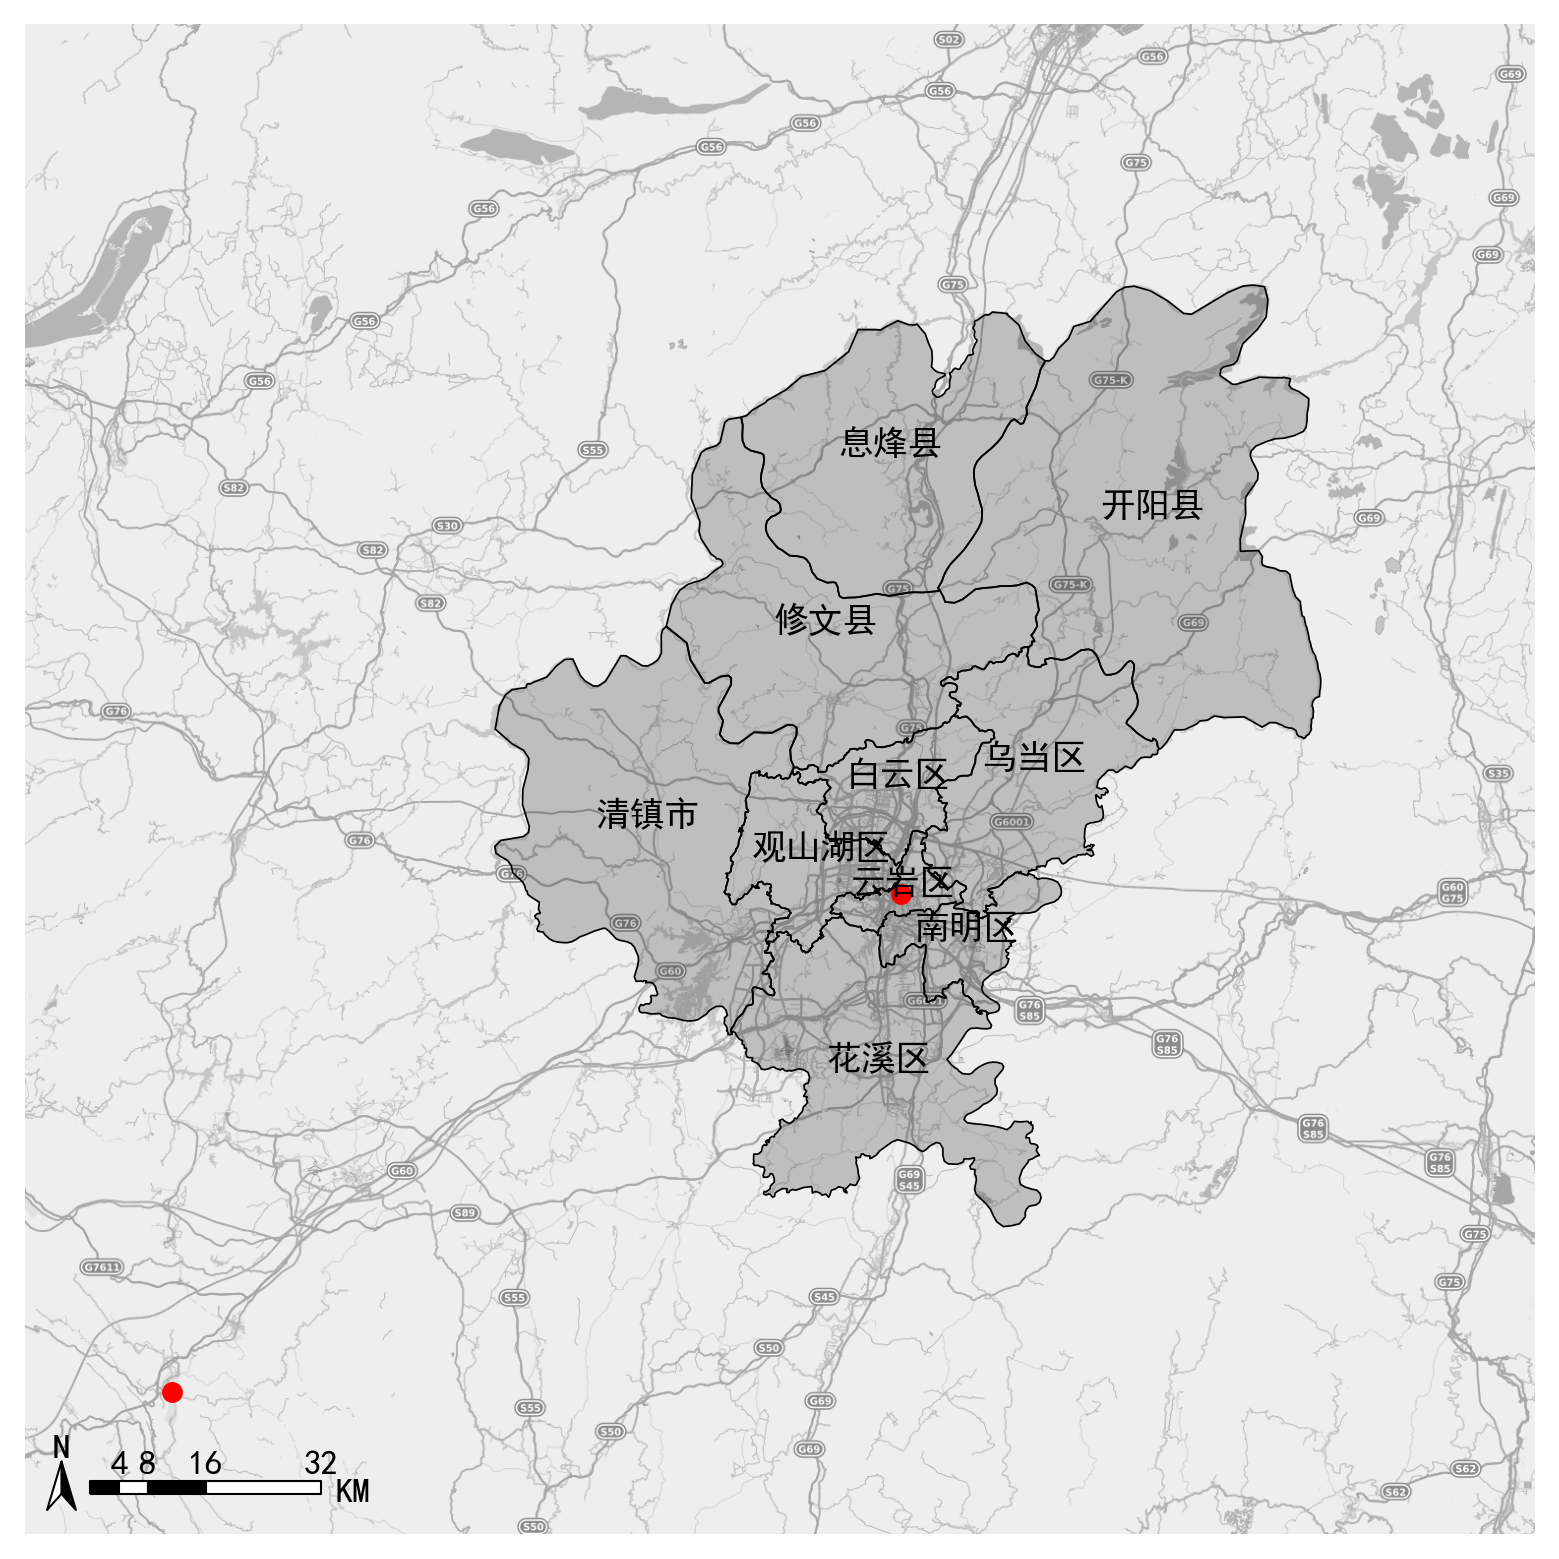

In [13]:
fig  = plt.figure(figsize=(10, 8), dpi=250)
ax = plt.subplot(111) # 返回一个AxesSubplot对象

bounds = [105.8, 26, 107.4,  27.5]
plot_map.plot_map(ax, bounds, zoom=10, style=4) # 添加底图
plot_map.plotscale(ax, bounds = bounds, textsize = 10, compasssize = 1, accuracy = 4000, rect = [-0.15, -0.1])  # 添加指北针和比例尺

gy.plot(ax=ax, edgecolor=(0,0,0,1), facecolor=(0,0,0,0.2), linewidth=0.5) # GeoDataFrame画图
plt.scatter(p1[0],  p1[1], color='red', s=25)
plt.scatter(p2[0],  p2[1], color='red', s=25)

for i, s in dis_gps.iterrows():
    plt.text(s['经度']-0.07, s['纬度'], s['区域'])

plt.axis('off')
plt.show()